Derek Atabayev

Exercise 3

# Exercise 3.1: Degrees and layouts
Now we will take a look at the networks in `example_1.txt` and `example_2.txt`. Read in the edge
list files and do the following:
* Do the basic measurements shown above. What can you suspect about the degree distribution of the network just based on the average and extremes in degree?
* Plot the degree distribution in log-log scale. Also plot it in linear scale. Comment on how this fits with the previous point.
* Draw the network using the two layout algorithms shown above. How does the the network's appearance echo your other findings?

In [1]:
# importing required modules
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

In [2]:
# read in the edge list "example_1.txt"
# undirected graph

example_1 = nx.read_edgelist('./example_1.txt', comments='#',
                                create_using=nx.Graph(), 
                                delimiter=' ',
                                nodetype=int,
                                encoding='utf-8')

In [3]:
# Perform basic measurements

print("Number of nodes: ", len(example_1))
print("Number of edges: ", example_1.size())
print("Average degree: ", 2*example_1.size()/len(example_1))


Number of nodes:  1000
Number of edges:  2991
Average degree:  5.982


There are 1000 nodes and 2991 edges, meaning the graph is definitely sparse.

The max number of edges = (1000 * 999) / 2 = 499500 and 2991 << 499500

In [4]:
degrees = [example_1.degree(node) for node in example_1] # an array of degrees for every node in order

min_degree = min(degrees)
max_degree = max(degrees)

print("Minimum degree: ", min_degree)
print("Maximum degree: ", max_degree)


Minimum degree:  3
Maximum degree:  98


The average degree is quite low despite their being high variance between min_degree and max_degree. 

This suggest a power-law distribution where the vast majority of nodes will have very low degrees and this drags the average down significantly.

Yet, there are a few very highly connected "hub" nodes (closer to the degree = 98 (max)) that dominate the connectivity of the network.

This dataset closely resembles real social media, where a small number of accounts have millions of followers, but the vast majority have like below 1000.


In [5]:
# Plot the degree distribution in log-log scale

# Get 10 logarithmically spaced bins between max and min degree
bin_edges = np.logspace(np.log10(min_degree), np.log10(max_degree), num=10)

# separate the data into these bines

density, _ = np.histogram(degrees, bins=bin_edges, density=True) # density=True normalizes the histogram

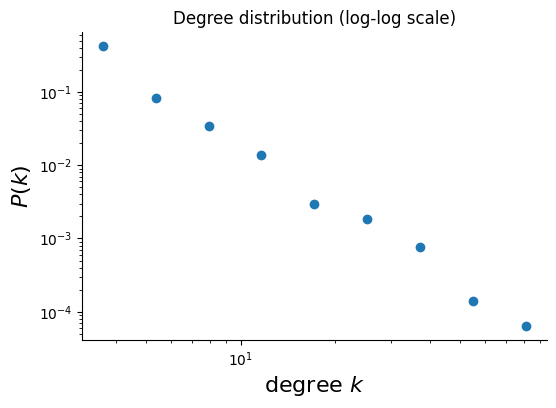

In [6]:
# plot

fig = plt.figure(figsize=(6,4))

# Assign a midpoint (10) (in log space) to each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2) 

plt.loglog(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top bounadires for aesthetics
ax = plt.gca() # this just gets the current axis

# ax.spines is a dictionary
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# add title
plt.title("Degree distribution (log-log scale)")

# plot
plt.show()

In this code, the x-axis represents the degree (k), and the y-axis is the probability that a random node will get the degree k. 

Since this is a log-log plot, we can be fairly certain that this is a power-law distribution as we see a straight line. 

In [7]:
# 10 linearly spaced bins
bin_edges = np.linspace(min_degree, max_degree, num=10)

# separate the data into these bins
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

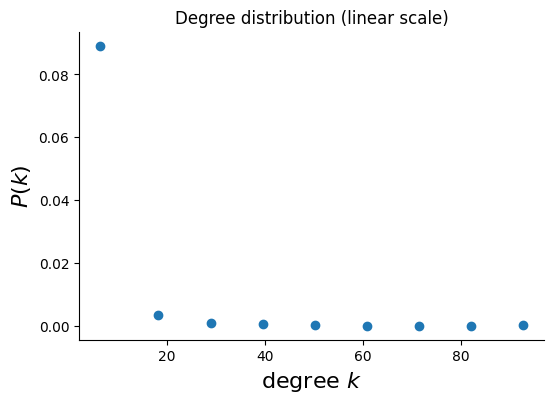

In [8]:
fig = plt.figure(figsize=(6,4))

long_be = np.log10(bin_edges)
x = 10**((long_be[1:] + long_be[:-1])/2) # assign x to be the midpoint of each bin

plt.plot(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries

ax = plt.gca() 
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.title("Degree distribution (linear scale)")

plt.show()

This is consistent with the observation of a power-law distribution. In linear time scale, a node has a much higher probability of getting a small degree than even a marginally larger one. (for example, compare degree = 5 with degree = 15)

Layout Diagrams

In these we expect that nodes with very high degrees will be centrally located and will be visually prominent.

However, the vast majority of nodes with low degrees will be pushed towards the periphery of the visualization and form kind of like a cloud around the few central hubs.

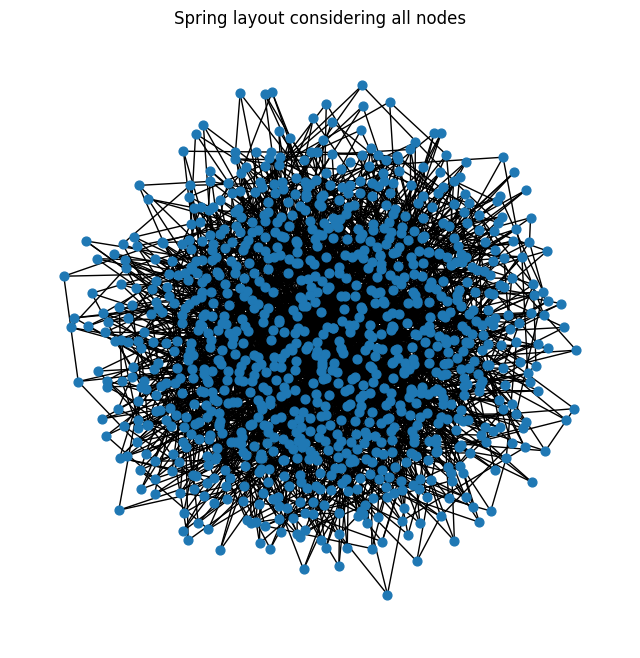

In [9]:
# Using the force-based or "spring" layout algorithm
fig = plt.figure(figsize=(8,8))
# put a title
plt.title("Spring layout considering all nodes")
nx.draw_spring(example_1, node_size=40)

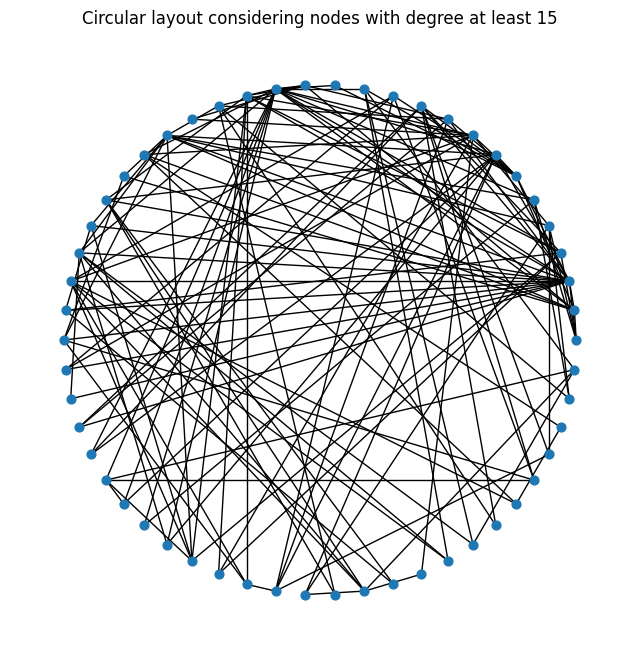

In [10]:
# fcircular layout algorithm

fig = plt.figure(figsize=(8,8))
# clean up to only show nodes with degree k > 15
example_1_filtered = example_1.copy()
example_1_filtered.remove_nodes_from([node for node in example_1 if example_1.degree(node) < 15])

plt.title("Circular layout considering nodes with degree at least 15")

nx.draw_circular(example_1_filtered, node_size=40)

Here, we can definitely see central hubs in the Force-Directed Layout. There is a potential for some loss of information because of the hairball of edges in the centre. The clusters of nodes on the outside are far more loosely connected.

The fcircular layout diagram was a little bit messy. I cleaned it up by removing all nodes with degree < 15. Consider that there are almost 3000 nodes, and this fcircular layout diagram says a lot. There are a countable (you could count by hand) number of nodes with degree >= 15 among thousands of possible connections. So, this is certaintly a power law distribution that is sparse.

# Exercise 3.2: Network regimes
* Let's use what we've learned today to reproduce some of the results on pg. 16 of Chapter 3: Random Networks
* Recall there are four regimes: Subcritical, Critical, Supercritical, and Connected
* ***You can use the networkx function `fast_gnp_random_graph(n, p)` to generate your networks***

## Subcritical, Critical, and Supercritical regimes
You will consider networks of average degree $k = 0.5, k=1$, and $k=2$ respectively. Choose connection probabilities accordingly. For each value of $k$, do the following:
* Generate one random network each of sizes $N=10^2, 10^3, 10^4, 10^5$, and $10^6$ using the average degree
* For each network, get the connected components (see below). 
* Following the procedure for plotting distributions above, modify the code to plot the distribution of the sizes of the connected components in log-log scale. Plot this for all the networks in the same figure using different colors. 
* Calculate the size of the largest component for each of the 5 networks. Are they giant components? Write new code to plot the largest component size as a function of N in semi-log scale (hint: use `plt.semilogx`)
* Compare the above two results with your expectation from the book

In [11]:
# k = 0.5

# Generate networks with fast_gnp_random_graph(n, p) - because this is sparse
# n is the number of nodes
# p is the probability of an edge between any two nodes

# for every network, p = k / (N - 1)

G1 = nx.fast_gnp_random_graph(10**2, 0.5/(10**2 - 1))
G2 = nx.fast_gnp_random_graph(10**3, 0.5/(10**3 - 1))
G3 = nx.fast_gnp_random_graph(10**4, 0.5/(10**4 - 1))
G4 = nx.fast_gnp_random_graph(10**5, 0.5/(10**5 - 1))
G5 = nx.fast_gnp_random_graph(10**6, 0.5/(10**6 - 1))


In [12]:
# Get the connected components of each network
cc1 = list(nx.connected_components(G1))
cc2 = list(nx.connected_components(G2))
cc3 = list(nx.connected_components(G3))
cc4 = list(nx.connected_components(G4))
cc5 = list(nx.connected_components(G5))

print("G1 has {0} connected components.".format(len(cc1)))
print("G2 has {0} connected components.".format(len(cc2)))
print("G3 has {0} connected components.".format(len(cc3)))
print("G4 has {0} connected components.".format(len(cc4)))
print("G5 has {0} connected components.".format(len(cc5)))


G1 has 77 connected components.
G2 has 731 connected components.
G3 has 7493 connected components.
G4 has 75270 connected components.
G5 has 749926 connected components.


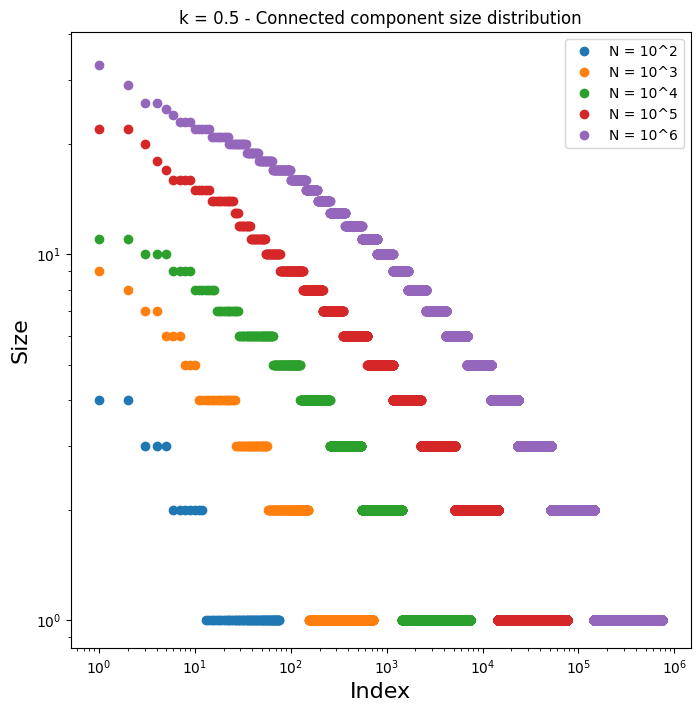

In [13]:
# Plot the distribution of the sizes in log-log scale with different colours
fig = plt.figure(figsize=(8, 8))

# Get the sizes of the connected components
sizes1 = [len(cc) for cc in cc1]
sizes2 = [len(cc) for cc in cc2]
sizes3 = [len(cc) for cc in cc3]
sizes4 = [len(cc) for cc in cc4]
sizes5 = [len(cc) for cc in cc5]

# each of these should get a different colour
plt.loglog(sorted(sizes1, reverse=True), 'o', label='N = 10^2')
plt.loglog(sorted(sizes2, reverse=True), 'o', label='N = 10^3')
plt.loglog(sorted(sizes3, reverse=True), 'o', label='N = 10^4')
plt.loglog(sorted(sizes4, reverse=True), 'o', label='N = 10^5')
plt.loglog(sorted(sizes5, reverse=True), 'o', label='N = 10^6')

plt.xlabel("Index", fontsize=16) # Rank is 
plt.ylabel("Size", fontsize=16)

plt.legend()

plt.title("k = 0.5 - Connected component size distribution")

plt.show()





In [14]:
# find the largest connected component
largest_cc1 = max(cc1, key=len)

# find the largest connected component
largest_cc2 = max(cc2, key=len)

largest_cc3 = max(cc3, key=len)
largest_cc4 = max(cc4, key=len)
largest_cc5 = max(cc5, key=len)

print("The largest connected component of G1 has {0} nodes.".format(len(largest_cc1)))
print("The largest connected component of G2 has {0} nodes.".format(len(largest_cc2)))
print("The largest connected component of G3 has {0} nodes.".format(len(largest_cc3)))
print("The largest connected component of G4 has {0} nodes.".format(len(largest_cc4)))
print("The largest connected component of G5 has {0} nodes.".format(len(largest_cc5)))




The largest connected component of G1 has 5 nodes.
The largest connected component of G2 has 10 nodes.
The largest connected component of G3 has 11 nodes.
The largest connected component of G4 has 22 nodes.
The largest connected component of G5 has 34 nodes.


None of these vertices are giant components because a majority of nodes is not connected to them.



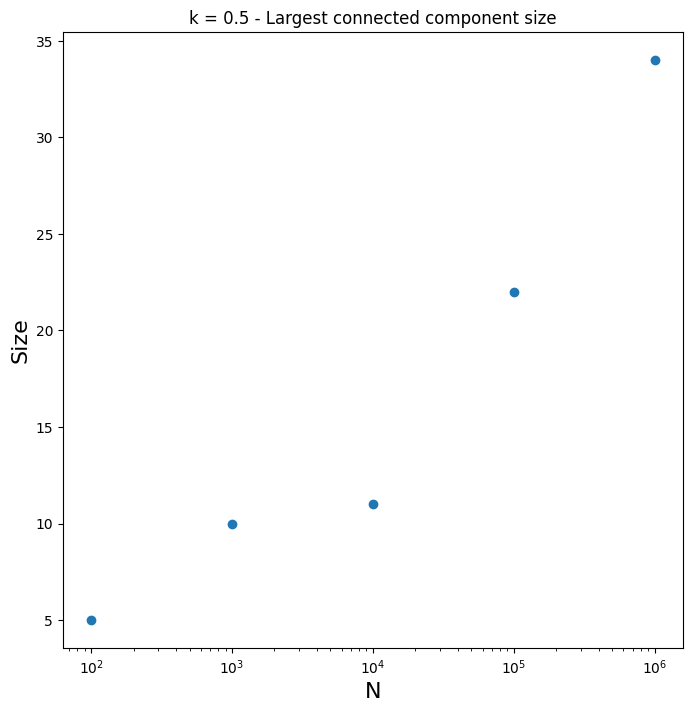

In [15]:
# Plot the largest component size as a function of N in semi-log scale with different colours
fig = plt.figure(figsize=(8, 8))

# Get the sizes of the largest connected components
sizes = [len(largest_cc1), len(largest_cc2), len(largest_cc3), len(largest_cc4), len(largest_cc5)]

# each of these should get a different colour
plt.semilogx([10**2, 10**3, 10**4, 10**5, 10**6], sizes, 'o') # x is in log scale

plt.xlabel("N", fontsize=16) # Number of nodes
plt.ylabel("Size", fontsize=16)

plt.title("k = 0.5 - Largest connected component size")

plt.show()




In [16]:
# k = 1

G1 = nx.fast_gnp_random_graph(10**2, 1/(10**2 - 1))
G2 = nx.fast_gnp_random_graph(10**3, 1/(10**3 - 1))
G3 = nx.fast_gnp_random_graph(10**4, 1/(10**4 - 1))
G4 = nx.fast_gnp_random_graph(10**5, 1/(10**5 - 1))
G5 = nx.fast_gnp_random_graph(10**6, 1/(10**6 - 1))

G1 has 57 connected components.
G2 has 460 connected components.
G3 has 5044 connected components.
G4 has 50361 connected components.
G5 has 499169 connected components.


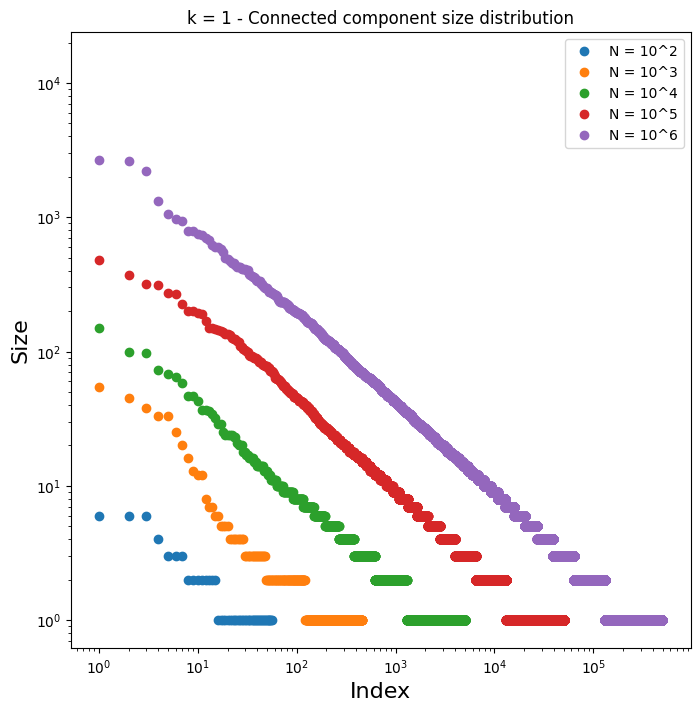

In [17]:
# Get the connected components of each network
cc1 = list(nx.connected_components(G1))
cc2 = list(nx.connected_components(G2))
cc3 = list(nx.connected_components(G3))
cc4 = list(nx.connected_components(G4))
cc5 = list(nx.connected_components(G5))

print("G1 has {0} connected components.".format(len(cc1)))
print("G2 has {0} connected components.".format(len(cc2)))
print("G3 has {0} connected components.".format(len(cc3)))
print("G4 has {0} connected components.".format(len(cc4)))
print("G5 has {0} connected components.".format(len(cc5)))
      
# Plot the distribution of the sizes in log-log scale with different colours
fig = plt.figure(figsize=(8, 8))

# Get the sizes of the connected components
sizes1 = [len(cc) for cc in cc1]
sizes2 = [len(cc) for cc in cc2]
sizes3 = [len(cc) for cc in cc3]
sizes4 = [len(cc) for cc in cc4]
sizes5 = [len(cc) for cc in cc5]

# each of these should get a different colour
plt.loglog(sorted(sizes1, reverse=True), 'o', label='N = 10^2')
plt.loglog(sorted(sizes2, reverse=True), 'o', label='N = 10^3')
plt.loglog(sorted(sizes3, reverse=True), 'o', label='N = 10^4')
plt.loglog(sorted(sizes4, reverse=True), 'o', label='N = 10^5')
plt.loglog(sorted(sizes5, reverse=True), 'o', label='N = 10^6')

plt.xlabel("Index", fontsize=16) # Rank is index
plt.ylabel("Size", fontsize=16)

plt.legend()

plt.title("k = 1 - Connected component size distribution")

plt.show()





The largest connected component of G1 has 12 nodes.
The largest connected component of G2 has 68 nodes.
The largest connected component of G3 has 704 nodes.
The largest connected component of G4 has 1108 nodes.
The largest connected component of G5 has 14787 nodes.


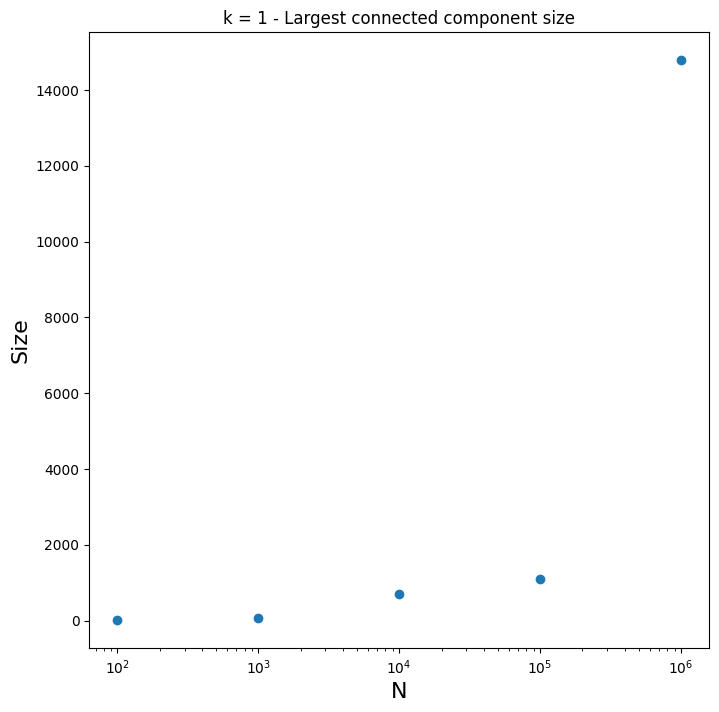

In [18]:
# Find the largest connected component
largest_cc1 = max(cc1, key=len)
largest_cc2 = max(cc2, key=len)
largest_cc3 = max(cc3, key=len)
largest_cc4 = max(cc4, key=len)
largest_cc5 = max(cc5, key=len)

print("The largest connected component of G1 has {0} nodes.".format(len(largest_cc1)))
print("The largest connected component of G2 has {0} nodes.".format(len(largest_cc2)))
print("The largest connected component of G3 has {0} nodes.".format(len(largest_cc3)))
print("The largest connected component of G4 has {0} nodes.".format(len(largest_cc4)))
print("The largest connected component of G5 has {0} nodes.".format(len(largest_cc5)))

# Plot the largest component size as a function of N in semi-log scale with different colours
fig = plt.figure(figsize=(8, 8))

# Get the sizes of the largest connected components
sizes = [len(largest_cc1), len(largest_cc2), len(largest_cc3), len(largest_cc4), len(largest_cc5)]

plt.semilogx([10**2, 10**3, 10**4, 10**5, 10**6], sizes, 'o') # x is in log scale

plt.xlabel("N", fontsize=16) # Number of nodes
plt.ylabel("Size", fontsize=16)

plt.title("k = 1 - Largest connected component size")

plt.show()

None of these largest connected components can rise to the level of a "giant component" because a majority of nodes are not connected within the component (far from it).

G1 has 15 connected components.
G2 has 147 connected components.
G3 has 1614 connected components.
G4 has 16175 connected components.
G5 has 161900 connected components.


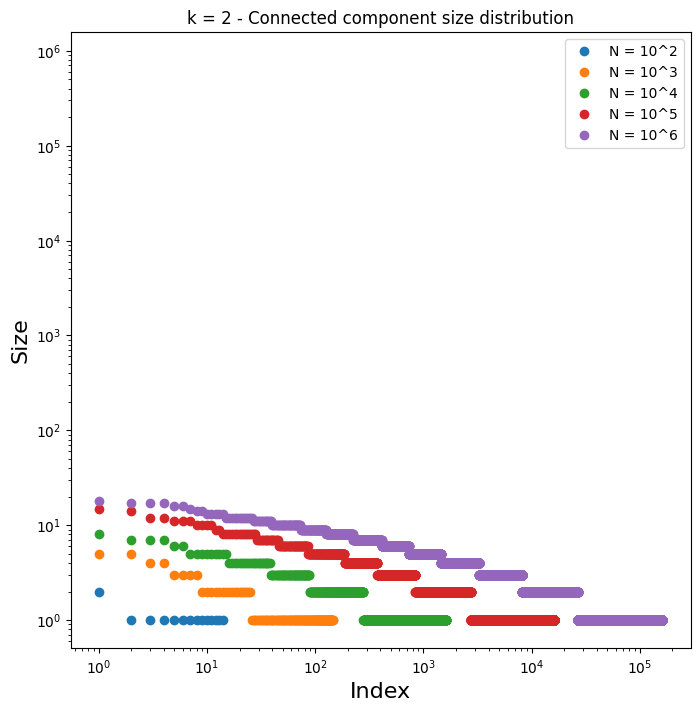

In [19]:
# k = 2

G1 = nx.fast_gnp_random_graph(10**2, 2/(10**2 - 1))
G2 = nx.fast_gnp_random_graph(10**3, 2/(10**3 - 1))
G3 = nx.fast_gnp_random_graph(10**4, 2/(10**4 - 1))
G4 = nx.fast_gnp_random_graph(10**5, 2/(10**5 - 1))
G5 = nx.fast_gnp_random_graph(10**6, 2/(10**6 - 1))

# Get the connected components of each network
cc1 = list(nx.connected_components(G1))
cc2 = list(nx.connected_components(G2))
cc3 = list(nx.connected_components(G3))
cc4 = list(nx.connected_components(G4))
cc5 = list(nx.connected_components(G5))

print("G1 has {0} connected components.".format(len(cc1)))
print("G2 has {0} connected components.".format(len(cc2)))
print("G3 has {0} connected components.".format(len(cc3)))
print("G4 has {0} connected components.".format(len(cc4)))
print("G5 has {0} connected components.".format(len(cc5)))

# Plot the distribution of the sizes in log-log scale with different colours
fig = plt.figure(figsize=(8, 8))

# Get the sizes of the connected components
sizes1 = [len(cc) for cc in cc1]
sizes2 = [len(cc) for cc in cc2]
sizes3 = [len(cc) for cc in cc3]
sizes4 = [len(cc) for cc in cc4]
sizes5 = [len(cc) for cc in cc5]

# each of these should get a different colour

plt.loglog(sorted(sizes1, reverse=True), 'o', label='N = 10^2')
plt.loglog(sorted(sizes2, reverse=True), 'o', label='N = 10^3')
plt.loglog(sorted(sizes3, reverse=True), 'o', label='N = 10^4')
plt.loglog(sorted(sizes4, reverse=True), 'o', label='N = 10^5')
plt.loglog(sorted(sizes5, reverse=True), 'o', label='N = 10^6')

plt.xlabel("Index", fontsize=16) # Rank is index
plt.ylabel("Size", fontsize=16)

plt.legend()

plt.title("k = 2 - Connected component size distribution")

plt.show()


The largest connected component of G1 has 85 nodes.
The largest connected component of G2 has 815 nodes.
The largest connected component of G3 has 7957 nodes.
The largest connected component of G4 has 79492 nodes.
The largest connected component of G5 has 796889 nodes.


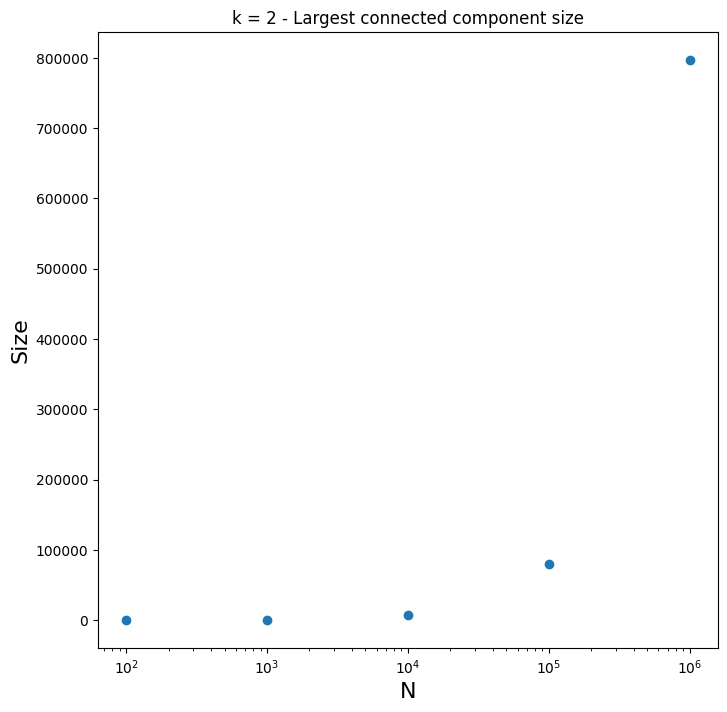

In [20]:
# Find the largest connected component

largest_cc1 = max(cc1, key=len)
largest_cc2 = max(cc2, key=len)
largest_cc3 = max(cc3, key=len)
largest_cc4 = max(cc4, key=len)
largest_cc5 = max(cc5, key=len)

print("The largest connected component of G1 has {0} nodes.".format(len(largest_cc1)))
print("The largest connected component of G2 has {0} nodes.".format(len(largest_cc2)))
print("The largest connected component of G3 has {0} nodes.".format(len(largest_cc3)))
print("The largest connected component of G4 has {0} nodes.".format(len(largest_cc4)))
print("The largest connected component of G5 has {0} nodes.".format(len(largest_cc5)))

# Plot the largest component size as a function of N in semi-log scale with different colours
fig = plt.figure(figsize=(8, 8))

# Get the sizes of the largest connected components
sizes = [len(largest_cc1), len(largest_cc2), len(largest_cc3), len(largest_cc4), len(largest_cc5)]

plt.semilogx([10**2, 10**3, 10**4, 10**5, 10**6], sizes, 'o') # x is in log scale

plt.xlabel("N", fontsize=16) # Number of nodes
plt.ylabel("Size", fontsize=16)

plt.title("k = 2 - Largest connected component size")

plt.show()


For k = 2, each node is connected to two other nodes on average, and every "largest" component can be classified as a "giant" component because it has a majority (more than half) of nodes connected

G1.size() = 100, and the largest component has 80 connected nodes -> giant component

G2.size() = 1000, and the largest component has 784 connected nodes -> giant component

G3.size() = 10000 and the largest component has 7956 connected nodes -> giant component

and so on...

Comparing my findings to expectations from the book

Consider p in cases of k = 0.5, 1, 2

k = 0.5 -> p is always 0.005 or smaller

Therefore, p is much smaller than 1/n. The random graphs remain in the subcritical regime which is consistent to the distribution of the size of the largest components (much smaller than a giant component).

k = 1 -> p is always 0.01 or smaller

Just barely meeting the threshold 1/n. We can say that the graph is in the critical regime. The size of the connected components are exponentially better than k = 0.5, but stil there is no giant component.

k = 2 -> p is always greater than 1/n

For example at n = 100, p = 0.02 > 1/100

This case is in the supercritical regime. Clearly, there is a giant component in each case, and its size exceeds the majority of the nodes in the graph.

Overall, the findings from the creation of random networks are consistent with the theories in the book. As the book mentioned, these networks are not so random after all.

